In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# 1. Présentation des différents jeu de données

## Importation des données

In [2]:
df_clients =  pd.read_csv('olist_customers_dataset.csv')
df_localisation =  pd.read_csv('olist_geolocation_dataset.csv')
df_commandes = pd.read_csv('olist_orders_dataset.csv')
df_articles =  pd.read_csv('olist_order_items_dataset.csv')
df_payements =  pd.read_csv('olist_order_payments_dataset.csv')
df_avis_commandes = pd.read_csv('olist_order_reviews_dataset.csv')
df_produits = pd.read_csv('olist_products_dataset.csv')
df_vendeurs = pd.read_csv('olist_sellers_dataset.csv')
df_produit_cat = pd.read_csv('product_category_name_translation.csv')

## <a name="C2">Analyse des différentes tables</a>

### Le dataframe df_clients

In [3]:
print('Les dimensions du dataframe : ', df_clients.shape)
df_clients.head()

Les dimensions du dataframe :  (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
miss = df_clients.isnull().sum()
miss_pourcent = (100 * df_clients.isnull().sum() / len(df_clients)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
customer_id,0,0.0
customer_unique_id,0,0.0
customer_zip_code_prefix,0,0.0
customer_city,0,0.0
customer_state,0,0.0


#### Recherche de duplicatas

In [6]:
df_clients.duplicated().sum()

0

In [7]:
df_clients.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [8]:
df_clients.describe(include="object")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


### Le dataframe df_localisation

In [9]:
print('Les dimensions du data testing : ', df_localisation.shape)
df_localisation.head()

Les dimensions du data testing :  (1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
df_localisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
miss = df_localisation.isnull().sum()
miss

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [12]:
miss = df_localisation.isnull().sum()
miss_pourcent = (100 * df_localisation.isnull().sum() / len(df_localisation)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
geolocation_zip_code_prefix,0,0.0
geolocation_lat,0,0.0
geolocation_lng,0,0.0
geolocation_city,0,0.0
geolocation_state,0,0.0


In [13]:
df_localisation.dtypes

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

In [14]:
my_data = df_localisation.drop(['geolocation_city','geolocation_state'], axis=1)
X = my_data.values

In [15]:
from sklearn import preprocessing

scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)

In [16]:
df = pd.DataFrame(ada_scaled)
df.columns = ['CodePostal','Latitude','Longitude']

In [17]:
df.describe()

,CodePostal,Latitude,Longitude
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,-1.276943e-13,1.225779e-14,1.255874e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.164450e+00,-2.699368e+00,-1.289918e+01
25%,-8.346885e-01,-4.246765e-01,-5.111852e-01
50%,-3.287853e-01,-3.049801e-01,-5.792788e-02
75%,8.815199e-01,2.093354e-01,6.142830e-01
max,2.075851e+00,1.158917e+01,3.922855e+01


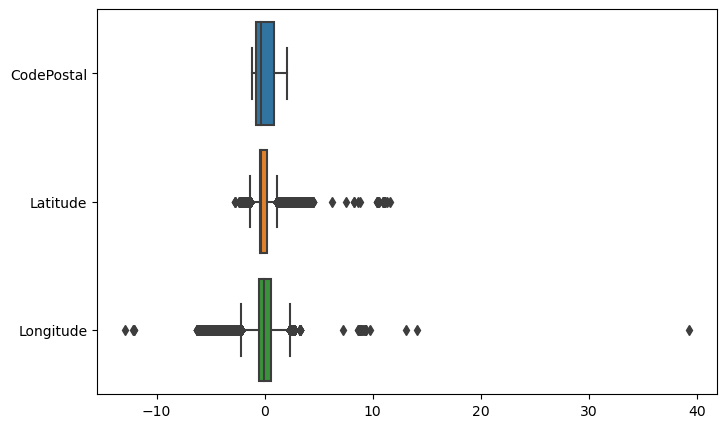

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, orient="h")
plt.show()     

### Le dataframe df_commandes

In [19]:
print('Les dimensions du data testing : ', df_commandes.shape)
df_commandes.head()

Les dimensions du data testing :  (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
df_commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
miss = df_commandes.isnull().sum()
miss

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
df_commandes.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [23]:
miss_pourcent = (100 * df_commandes.isnull().sum() / len(df_commandes)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
order_delivered_customer_date,2965,2.982
order_delivered_carrier_date,1783,1.793
order_approved_at,160,0.161
order_id,0,0.000
customer_id,0,0.000
order_status,0,0.000
order_purchase_timestamp,0,0.000
order_estimated_delivery_date,0,0.000


In [24]:
com_data = df_commandes.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [25]:
com_data.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [26]:
df_commandes.duplicated().sum()

0

In [27]:
com_data.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,0,0,0,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


### Le dataframe df_articles

In [28]:
print('Les dimensions du dataframe articles : ', df_articles.shape)
df_articles.head()

Les dimensions du dataframe articles :  (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [29]:
df_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [30]:
miss = df_articles.isnull().sum()

In [31]:
df_articles.duplicated().sum()

0

In [32]:
df_articles.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Le dataframe df_payements

In [33]:
print('Les dimensions du dataframe : ', df_payements.shape)
df_payements.head()

Les dimensions du dataframe :  (103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [34]:
df_payements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [35]:
miss = df_payements.isnull().sum()
miss

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [36]:
df_payements.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Le dataframe df_avis_commandes

In [37]:
print('Les dimensions du dataframe: ', df_avis_commandes.shape)
df_avis_commandes.head()

Les dimensions du dataframe:  (99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [38]:
df_avis_commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [39]:
miss = df_avis_commandes.isnull().sum()

In [40]:
miss_pourcent = (100 * df_avis_commandes.isnull().sum() / len(df_avis_commandes)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
review_comment_title,87656,88.342
review_comment_message,58247,58.703
review_id,0,0.000
order_id,0,0.000
review_score,0,0.000
review_creation_date,0,0.000
review_answer_timestamp,0,0.000


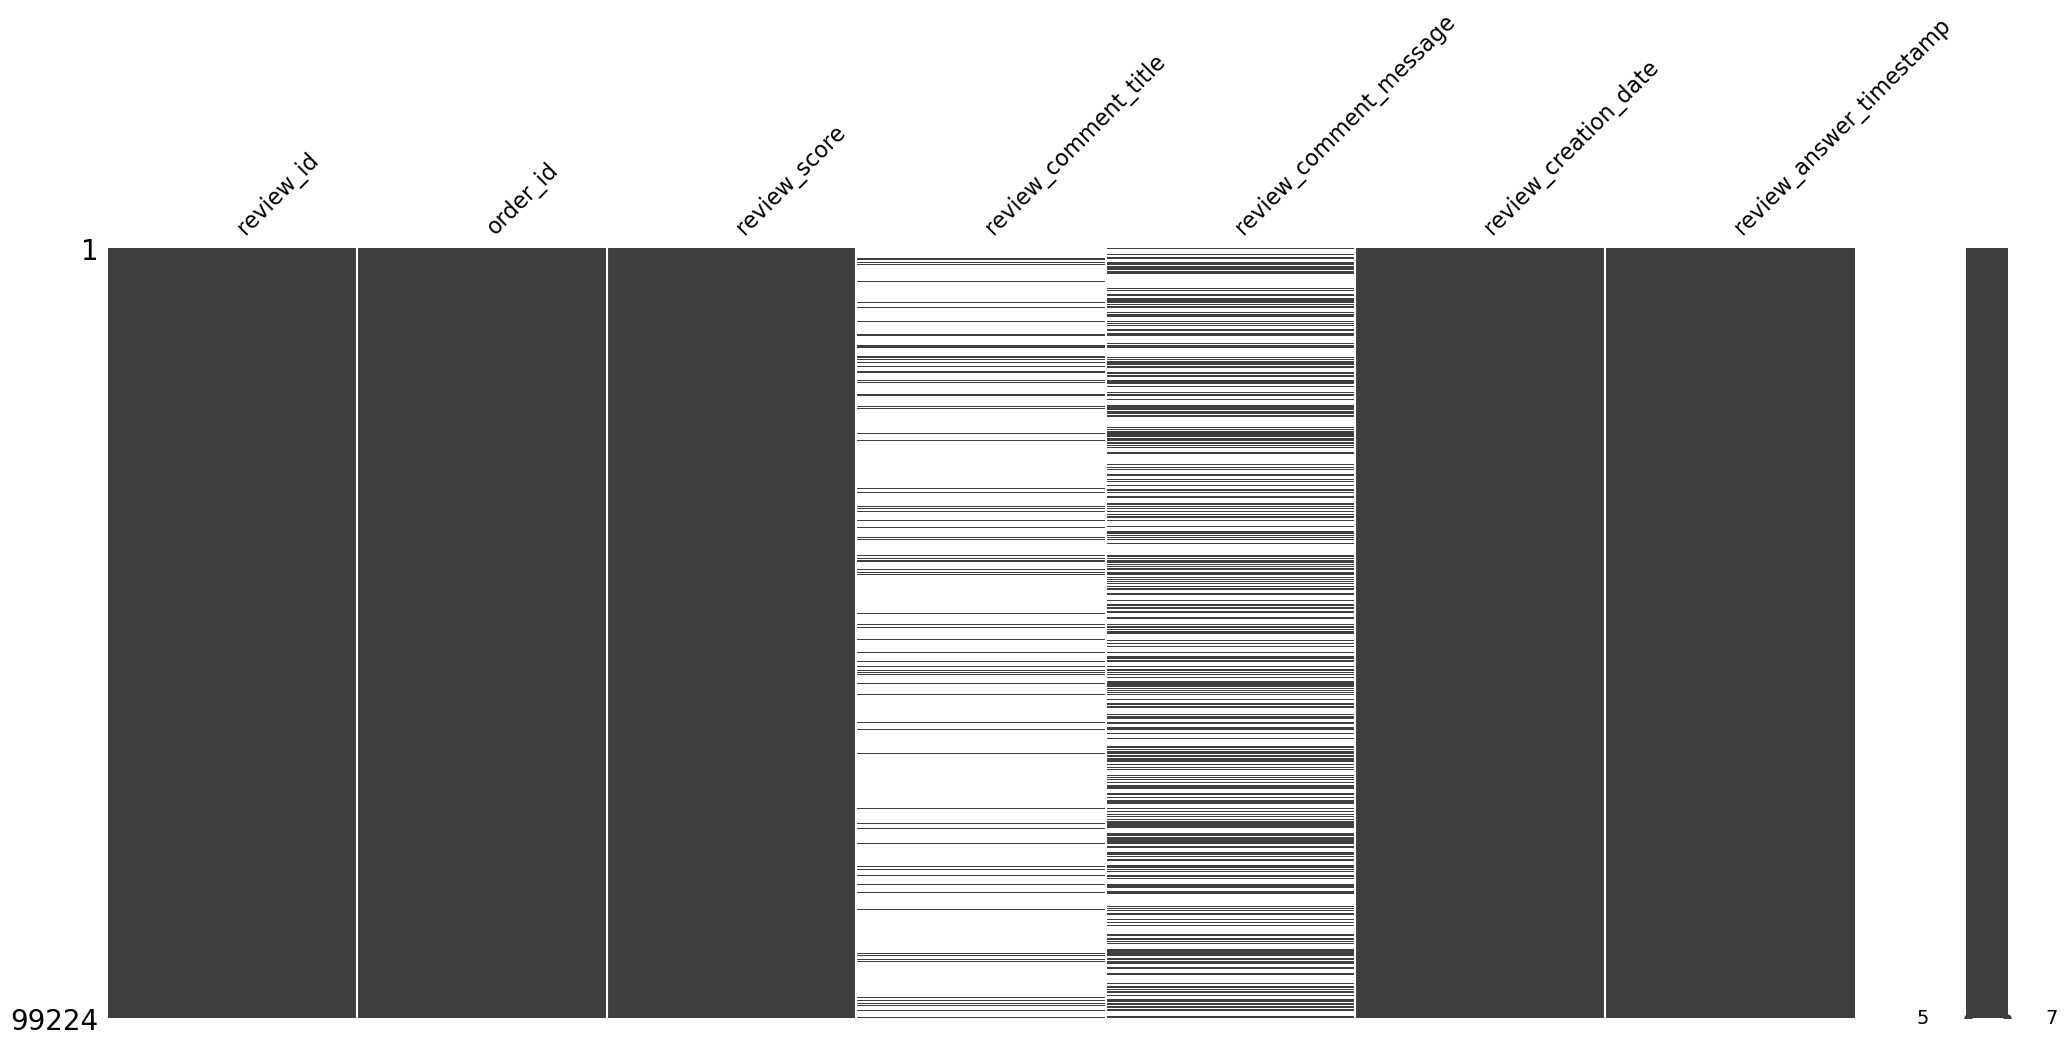

In [41]:
msno.matrix(df_avis_commandes);

In [42]:
df_avi = df_avis_commandes.drop(['review_comment_title', 'review_comment_message'], axis=1)

In [43]:
df_avi

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


In [44]:
df_avi.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [45]:
df_avi.duplicated().sum()

0

In [46]:
df_avi.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [47]:
df_avi

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


###  Le dataframe df_produits

In [48]:
print('Les dimensions du dataframe: ', df_produits.shape)
df_produits.head()

Les dimensions du dataframe:  (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [49]:
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [50]:
miss = df_produits.isnull().sum()

In [51]:
miss_pourcent = (100 * df_produits.isnull().sum() / len(df_produits)).round(3)
TableManq= pd.concat([miss, miss_pourcent], axis=1)
TableManq.columns  = ['Nbr_Val_Manq','%Val_manq']
TableManq.sort_values(by='%Val_manq', ascending=False)

,Nbr_Val_Manq,%Val_manq
product_category_name,610,1.851
product_name_lenght,610,1.851
product_description_lenght,610,1.851
product_photos_qty,610,1.851
product_weight_g,2,0.006
product_length_cm,2,0.006
product_height_cm,2,0.006
product_width_cm,2,0.006
product_id,0,0.000


In [52]:
prod_data = df_produits.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [53]:
prod_data.duplicated().sum()

0

In [54]:
prod_data.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,47.579527,757.213104,2.148463,2276.334315,30.813207,16.936633,23.195320
std,12.071951,637.745057,1.745732,4281.945502,16.915648,13.637779,12.080033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,326.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Le dataframe df_vendeurs 

In [55]:
print('Les dimensions du dataframe: ', df_vendeurs.shape)
df_vendeurs.head()

Les dimensions du dataframe:  (3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [56]:
df_vendeurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [57]:
miss = df_vendeurs.isnull().sum()
miss

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [58]:
df_vendeurs.duplicated().sum()

0

In [59]:
df_vendeurs.describe(include="object")

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


### Le dataframe produit_cat

In [60]:
print('Les dimensions du dataframe: ', df_produit_cat.shape)
df_produit_cat.head()

Les dimensions du dataframe:  (71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [61]:
df_produit_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [62]:
miss = df_produit_cat.isnull().sum()
miss

product_category_name            0
product_category_name_english    0
dtype: int64

In [63]:
df_produit_cat.duplicated().sum()

0

## <a name="C2">Fusion des différentes tables avec la fonction merge</a>
<a href="#C5">Haut</a>

In [64]:
# jointure entre les dataframes clients et commandes
df_Cli_com = pd.merge(df_clients, com_data, on='customer_id')

In [65]:
df0=  pd.merge(df_Cli_com, df_payements, on='order_id')

In [66]:
df1 = pd.merge(df0, df_avi, on='order_id')

In [67]:
df2 =  pd.merge(df1, df_articles, on='order_id')

In [68]:
df3 = pd.merge(df2, df_vendeurs, on='seller_id')

In [69]:
df4 = pd.merge(df3, df_produits, on='product_id')

In [70]:
df_m =df5 = pd.merge(df4, df_produit_cat, on='product_category_name')

In [71]:
df_m.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,SP,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture


In [72]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    115609 non-null  object 
 1   customer_unique_id             115609 non-null  object 
 2   customer_zip_code_prefix       115609 non-null  int64  
 3   customer_city                  115609 non-null  object 
 4   customer_state                 115609 non-null  object 
 5   order_id                       115609 non-null  object 
 6   order_status                   115609 non-null  object 
 7   order_purchase_timestamp       115609 non-null  object 
 8   order_approved_at              115609 non-null  object 
 9   order_delivered_carrier_date   115609 non-null  object 
 10  order_delivered_customer_date  115609 non-null  object 
 11  order_estimated_delivery_date  115609 non-null  object 
 12  payment_sequential            

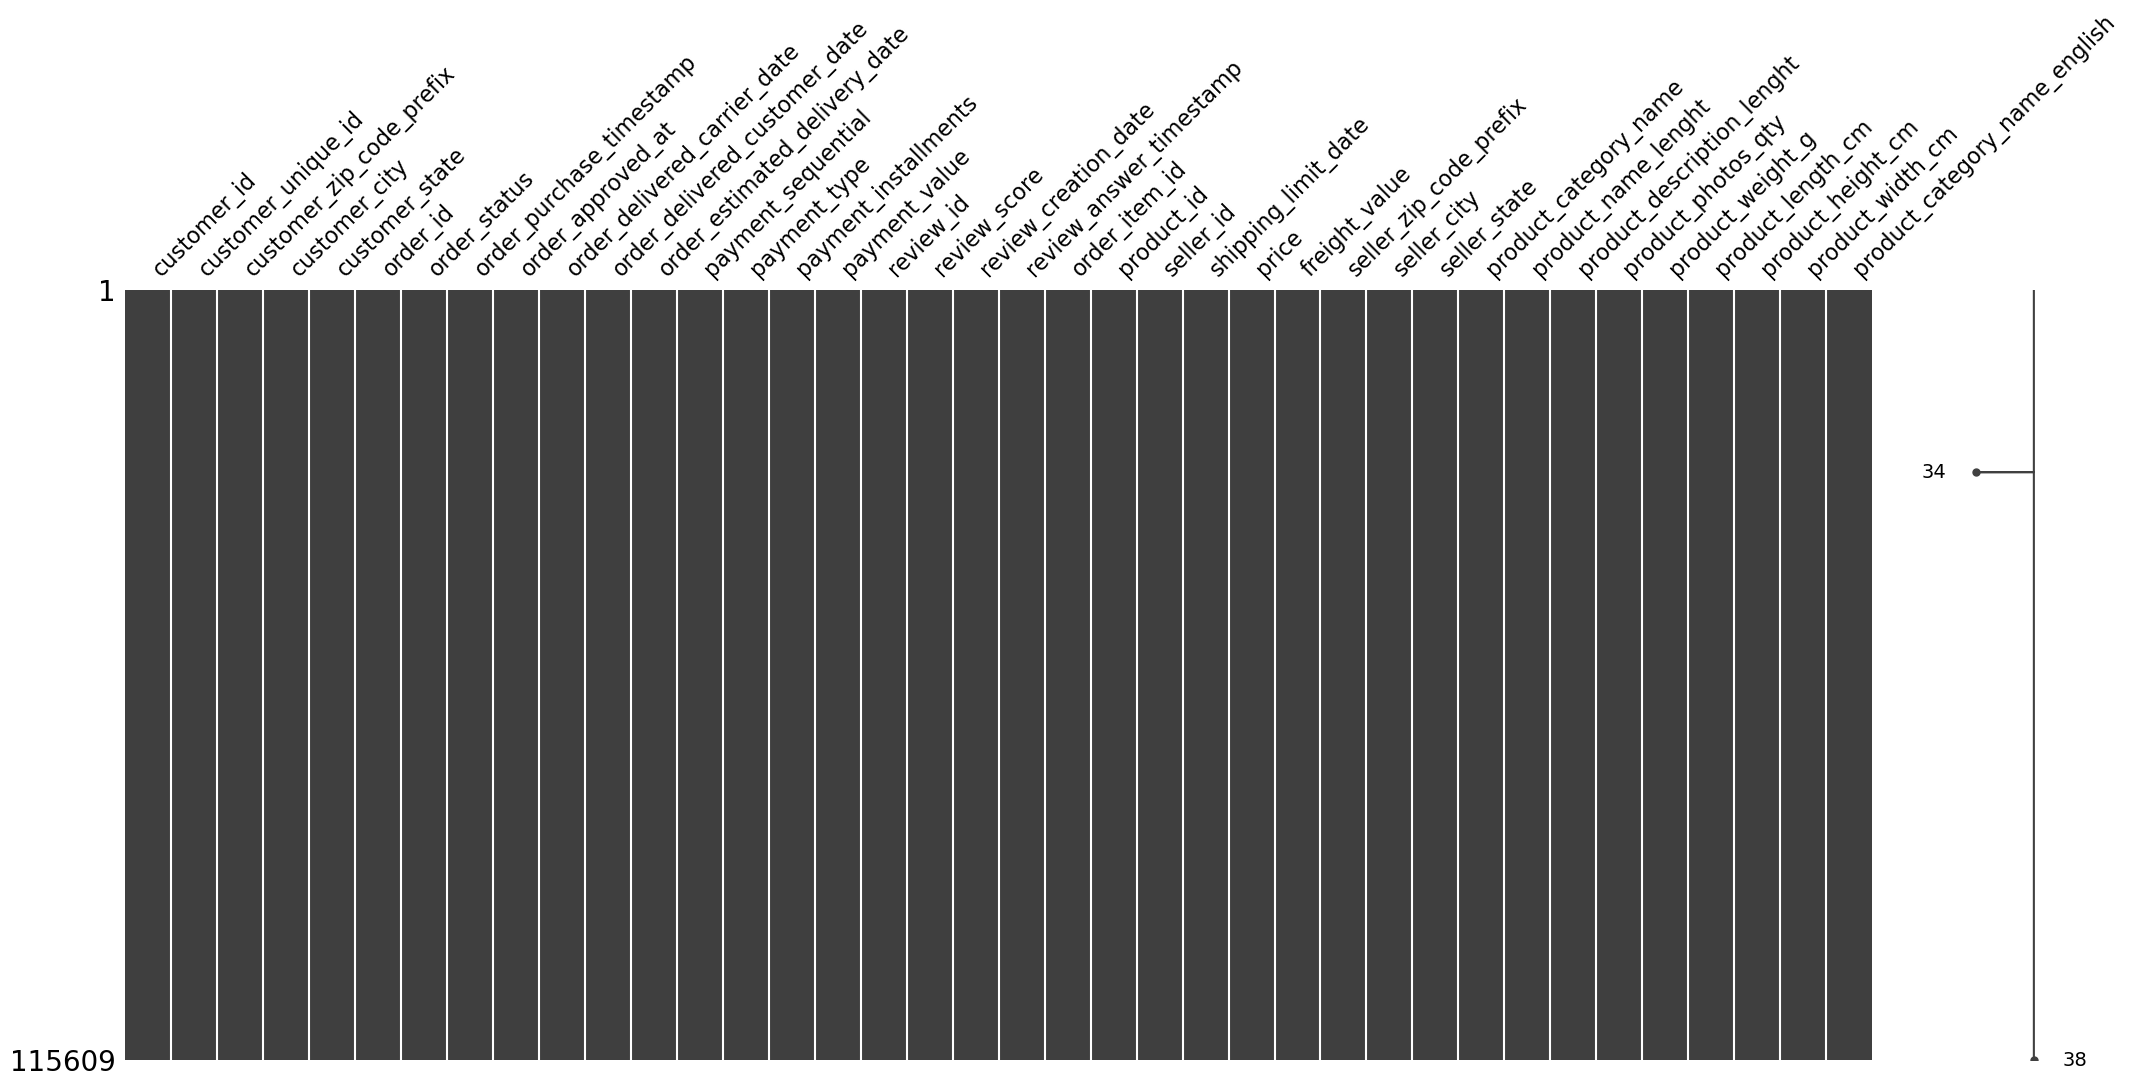

In [73]:
msno.matrix(df_m);

In [74]:
miss_pourcent = (100 * df_m.isnull().sum() / len(df_m)).round(3)

In [75]:
miss_pourcent

customer_id                      0.000
customer_unique_id               0.000
customer_zip_code_prefix         0.000
customer_city                    0.000
customer_state                   0.000
order_id                         0.000
order_status                     0.000
order_purchase_timestamp         0.000
order_approved_at                0.000
order_delivered_carrier_date     0.000
order_delivered_customer_date    0.000
order_estimated_delivery_date    0.000
payment_sequential               0.000
payment_type                     0.000
payment_installments             0.000
payment_value                    0.000
review_id                        0.000
review_score                     0.000
review_creation_date             0.000
review_answer_timestamp          0.000
order_item_id                    0.000
product_id                       0.000
seller_id                        0.000
shipping_limit_date              0.000
price                            0.000
freight_value            

In [76]:
df_m.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price           

In [77]:
num_data = ['customer_zip_code_prefix','payment_installments','payment_value','review_score','price','freight_value','seller_zip_code_prefix','product_name_lenght',
         'product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']
df_data = df_m[num_data]

In [78]:
df_data

,customer_zip_code_prefix,payment_installments,payment_value,review_score,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,14409,2,146.87,4,124.99,21.88,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,68030,1,275.79,1,112.99,24.90,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,68030,1,275.79,1,112.99,24.90,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,92480,7,140.61,3,124.99,15.62,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,25931,10,137.58,4,106.99,30.59,8577,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,89675,8,426.70,4,389.00,37.70,89701,59.0,284.0,2.0,12500.0,83.0,21.0,43.0
115605,13480,1,63.25,1,24.00,10.81,89701,41.0,194.0,1.0,450.0,31.0,10.0,18.0
115606,13870,3,160.46,5,139.00,21.46,89701,59.0,731.0,1.0,2200.0,84.0,12.0,15.0
115607,30130,2,55.18,5,129.00,26.18,89701,57.0,429.0,1.0,2700.0,85.0,7.0,40.0


In [79]:
df_data.describe()

,customer_zip_code_prefix,payment_installments,payment_value,review_score,price,freight_value,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000
mean,35061.537597,2.946233,172.387379,4.034409,120.619850,20.056880,24515.713958,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167
std,29841.671732,2.781087,265.873969,1.385584,182.653476,15.836184,27636.640968,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083
min,1003.000000,0.000000,0.000000,1.000000,0.850000,0.000000,1001.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,11310.000000,1.000000,60.870000,4.000000,39.900000,13.080000,6429.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,24241.000000,2.000000,108.050000,5.000000,74.900000,16.320000,13660.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,58745.000000,4.000000,189.480000,5.000000,134.900000,21.210000,28605.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,99980.000000,24.000000,13664.080000,5.000000,6735.000000,409.680000,99730.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [80]:
my_data = df_data
X = my_data.values

In [81]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler().fit(X)
ada_scaled = scale.transform(X)

In [82]:
df = pd.DataFrame(ada_scaled)
df.columns = ['Cp_client','PaymEchelne','PaymVal','ScoreCli','Prix','Fret','CpVendeur',
              'LongProdNom','DescLongProd','QtePhotprod','PoidsProd','LongProd','HautProd','LargProd']


In [83]:
df

,Cp_client,PaymEchelne,PaymVal,ScoreCli,Prix,Fret,CpVendeur,LongProdNom,DescLongProd,QtePhotprod,PoidsProd,LongProd,HautProd,LargProd
0,-0.692073,-0.340240,-0.095976,-0.024834,0.023926,0.115124,-0.576726,-0.774011,0.544426,-0.701711,1.737056,1.461479,3.515158,0.670932
1,1.104784,-0.699813,0.388918,-2.189996,-0.041772,0.305828,-0.576726,-0.774011,0.544426,-0.701711,1.737056,1.461479,3.515158,0.670932
2,1.104784,-0.699813,0.388918,-2.189996,-0.041772,0.305828,-0.576726,-0.774011,0.544426,-0.701711,1.737056,1.461479,3.515158,0.670932
3,1.924112,1.457626,-0.119521,-0.746554,0.023926,-0.280175,-0.576726,-0.774011,0.544426,-0.701711,1.737056,1.461479,3.515158,0.670932
4,-0.305967,2.536346,-0.130917,-0.024834,-0.074622,0.665133,-0.576726,-0.774011,0.544426,-0.701711,1.737056,1.461479,3.515158,0.670932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115604,1.830115,1.817199,0.956520,-0.024834,1.469347,1.114107,2.358665,1.019864,-0.769154,-0.119559,2.746380,3.250384,0.323711,1.691772
115605,-0.723204,-0.699813,-0.410487,-2.189996,-0.528981,-0.583911,2.358665,-0.774011,-0.907103,-0.701711,-0.439985,0.042693,-0.492706,-0.434977
115606,-0.710135,0.019333,-0.044861,0.696887,0.100629,0.088603,2.358665,1.019864,-0.084008,-0.701711,0.022765,3.312070,-0.344266,-0.690187
115607,-0.165257,-0.340240,-0.440840,0.696887,0.045880,0.386655,2.358665,0.820544,-0.546903,-0.701711,0.154980,3.373757,-0.715365,1.436562


### Analyse de la distribution des données (normalisation)

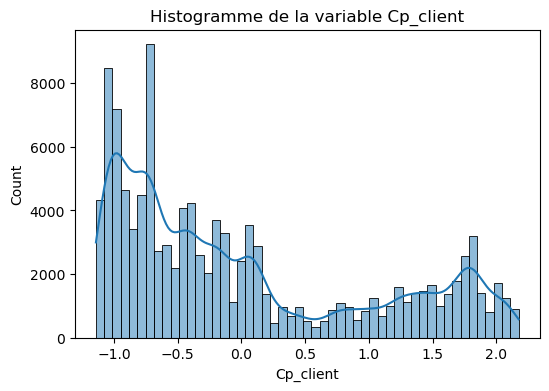

La variable Cp_client ne suit pas une loi normale (p-value=0.0)


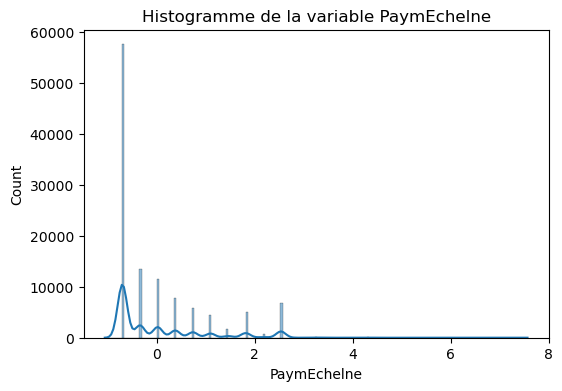

La variable PaymEchelne ne suit pas une loi normale (p-value=0.0)


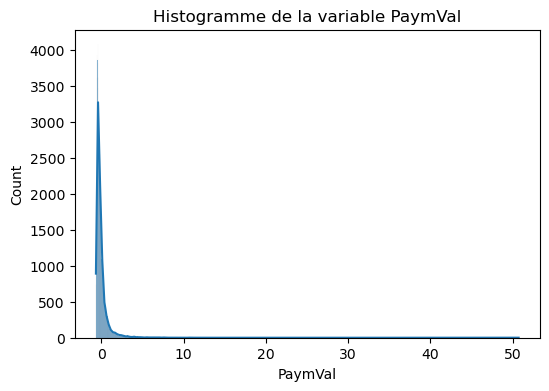

La variable PaymVal ne suit pas une loi normale (p-value=0.0)


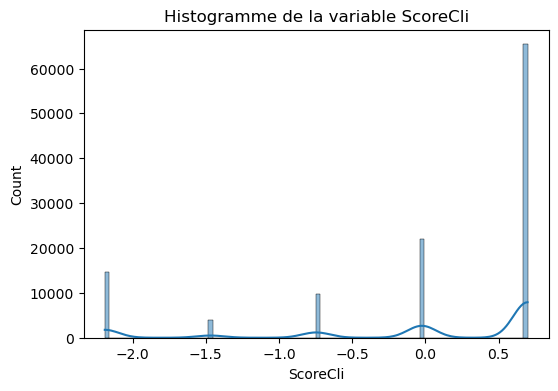

La variable ScoreCli ne suit pas une loi normale (p-value=0.0)


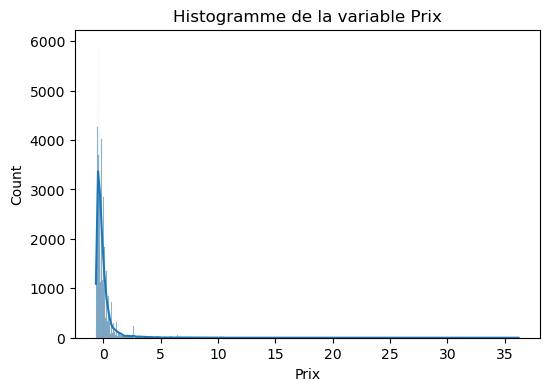

La variable Prix ne suit pas une loi normale (p-value=0.0)


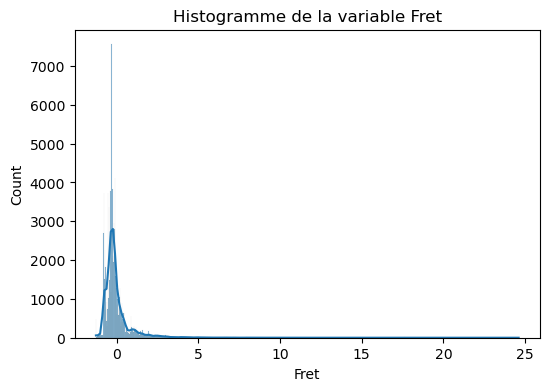

La variable Fret ne suit pas une loi normale (p-value=0.0)


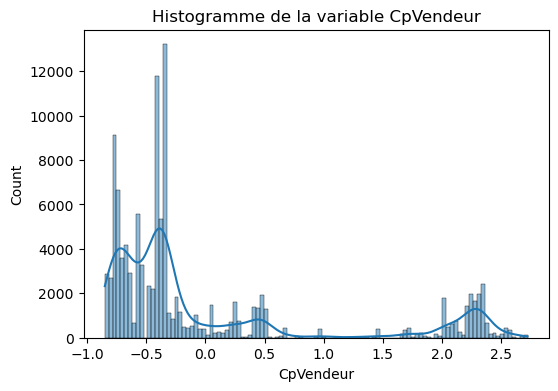

La variable CpVendeur ne suit pas une loi normale (p-value=0.0)


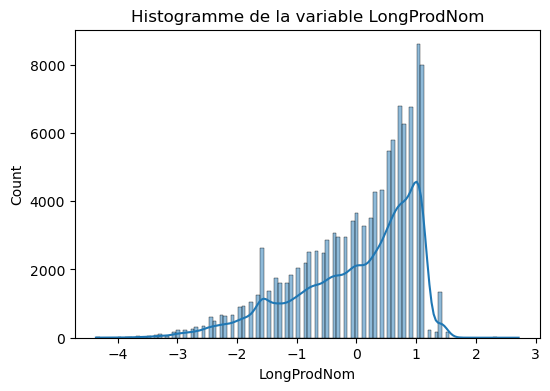

La variable LongProdNom ne suit pas une loi normale (p-value=0.0)


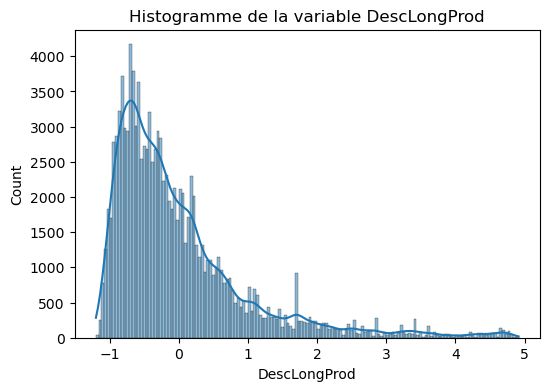

La variable DescLongProd ne suit pas une loi normale (p-value=0.0)


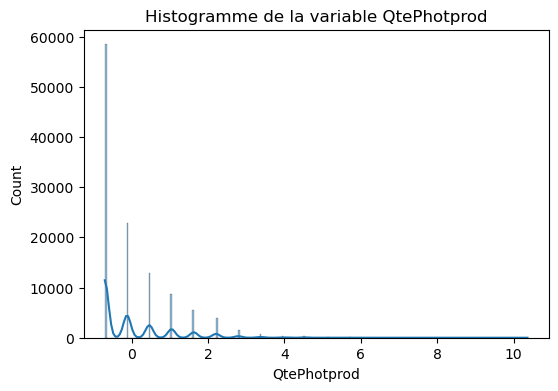

La variable QtePhotprod ne suit pas une loi normale (p-value=0.0)


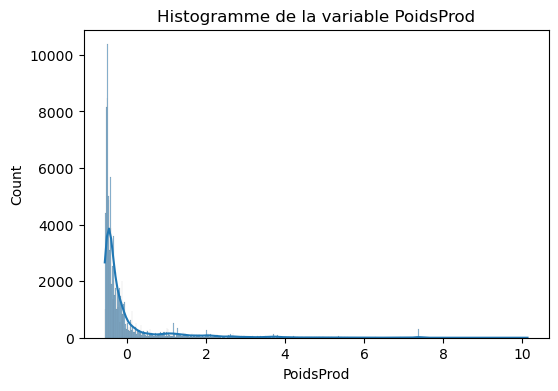

La variable PoidsProd suit une loi normale (p-value=nan)


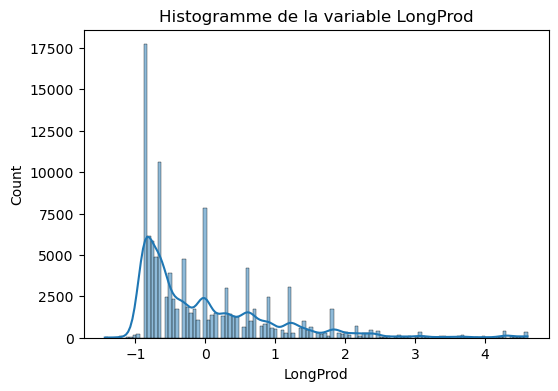

La variable LongProd suit une loi normale (p-value=nan)


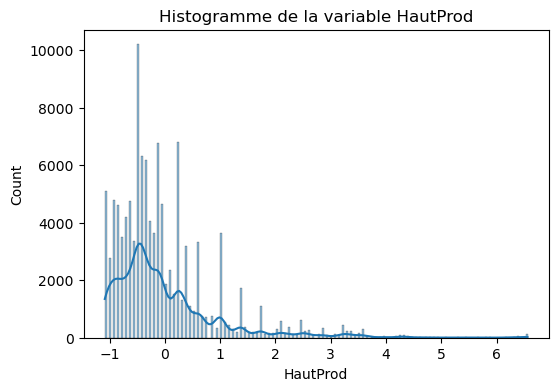

La variable HautProd suit une loi normale (p-value=nan)


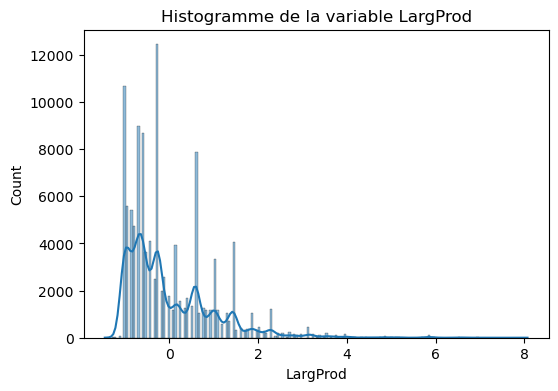

La variable LargProd suit une loi normale (p-value=nan)


In [151]:
import scipy.stats as stats
for column in df.columns :
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column} suit une loi normale (p-value={p_value})")

### Analyse de la distribution avec boxplot

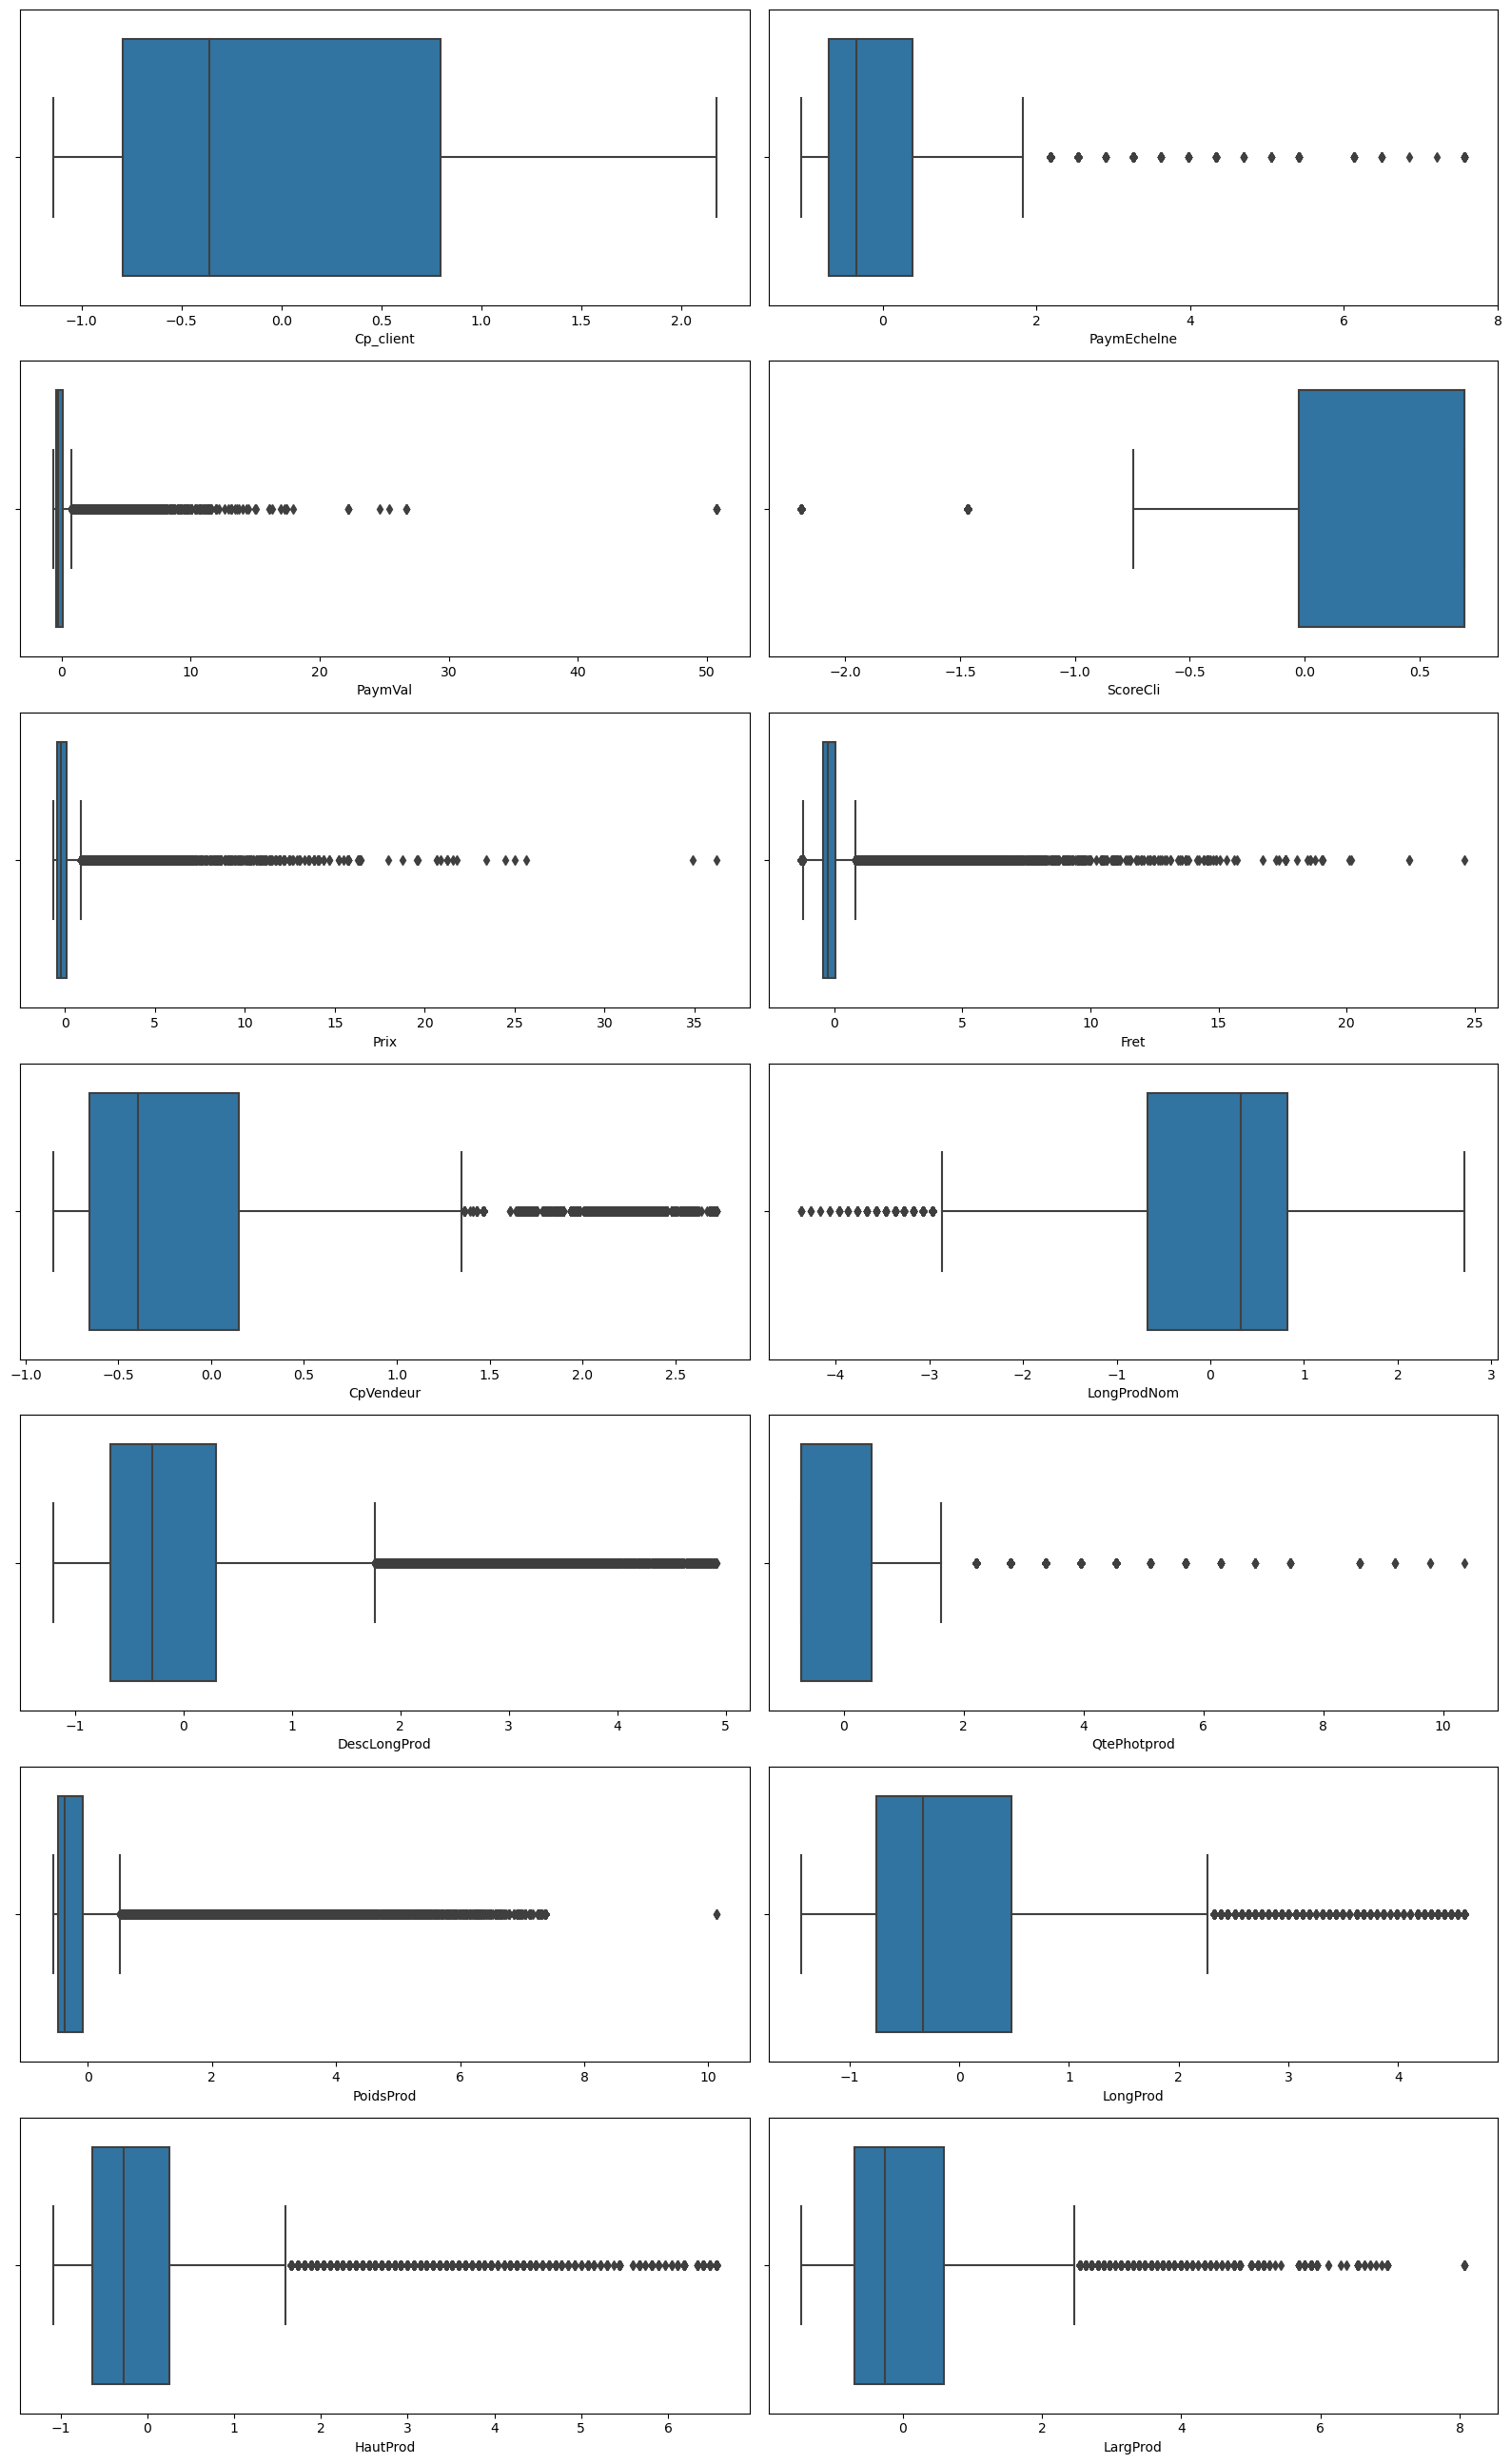

In [95]:
fig,ax = plt.subplots(nrows = 7, ncols=2, figsize=(16,26))
row = 0
col = 0
for i in range(len(df.columns)):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x =df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.show()

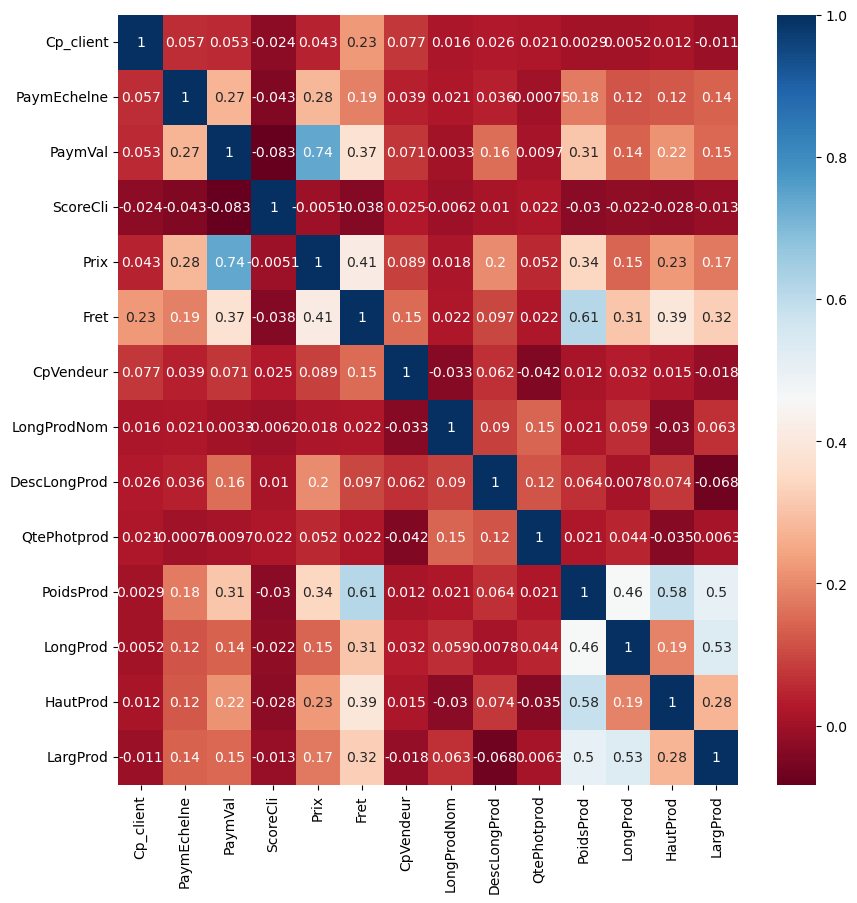

In [96]:
plt.figure(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True,cmap="RdBu");

## <a name="C4">Feature engeneering</a>

### Nombre de clients qui en ont commandés plusieurs produits
<a href="#C5">Haut</a>

In [152]:
df_m.shape

(115609, 40)

In [153]:
Nbr_comm = df_m.groupby('customer_unique_id')['order_id'].nunique()

In [154]:
Nbr_comm.shape[0]

93396

In [155]:
Plus_comm = sum(Nbr_comm > 1)

In [163]:
print("Nous avons ", Plus_comm," clients qui ont commandés plus d'un produit")

Nous avons  2807  clients qui ont commandés plus d'un produit


In [102]:
Pourc_comm = (Plus_comm / len(Nbr_comm)) * 100

In [164]:
print(f"{Pourc_comm:.2f}% des clients qui ont passés plusieurs commandes.")

3.01% des clients qui ont passés plusieurs commandes.


### le nbre de commande par client 

In [165]:
vue = df_m.groupby(['customer_unique_id']) ['order_id'].count().reset_index()
vue.columns = ['IdentClient','Total']
vue

,IdentClient,Total
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93391,fffcf5a5ff07b0908bd4e2dbc735a684,2
93392,fffea47cd6d3cc0a88bd621562a9d061,1
93393,ffff371b4d645b6ecea244b27531430a,1
93394,ffff5962728ec6157033ef9805bacc48,1


### La somme total depensée par client

In [166]:
dis_prix = df_m.groupby(['customer_unique_id']) ['price'].sum().reset_index()
dis_prix.columns = ['IdentClient','PrixTotal']
dis_prix.head(25)

,IdentClient,PrixTotal
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
5,0004bd2a26a76fe21f786e4fbd80607f,154.00
6,00050ab1314c0e55a6ca13cf7181fecf,27.99
7,00053a61a98854899e70ed204dd4bafe,382.00
8,0005e1862207bf6ccc02e4228effd9a0,135.00
9,0005ef4cd20d2893f0d9fbd94d3c0d97,104.90


### Nombre de commande par client

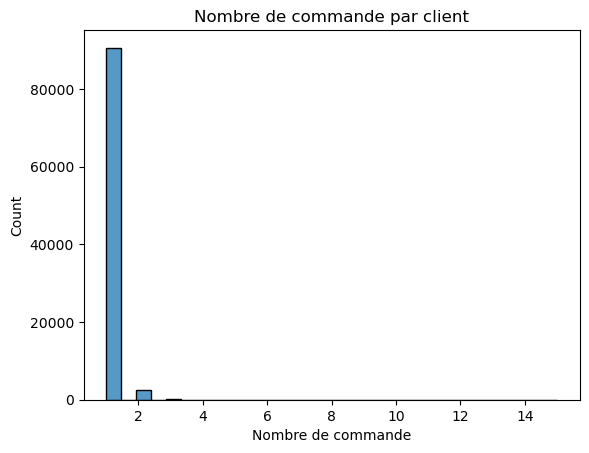

In [167]:
# Distribution of the number of orders per client 
sns.histplot(Nbr_comm, bins = 30)
plt.title('Nombre de commande par client')
plt.xlabel('Nombre de commande')
plt.show()

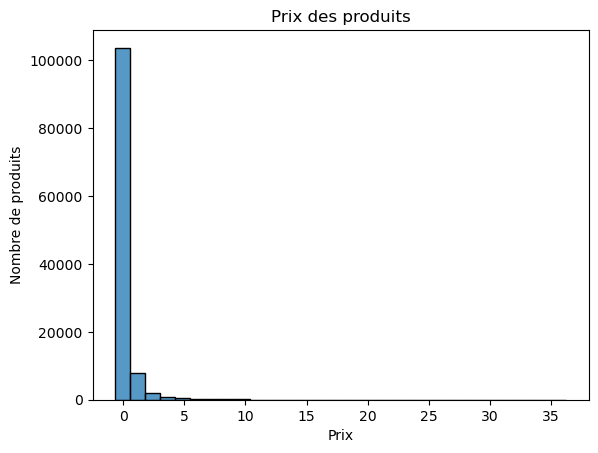

In [168]:
sns.histplot(df['Prix'], bins = 30)
plt.title('Prix des produits')
plt.xlabel('Prix')
plt.ylabel('Nombre de produits')
plt.show()

In [169]:
Nbr_Prod = df_m['product_category_name_english'].value_counts().sort_values(ascending = True)
Nbr_Prod 

security_and_services            2
fashion_childrens_clothes        8
cds_dvds_musicals               14
la_cuisine                      15
arts_and_craftmanship           24
                             ...  
computers_accessories         8105
furniture_decor               8743
sports_leisure                8942
health_beauty                 9944
bed_bath_table               11847
Name: product_category_name_english, Length: 71, dtype: int64

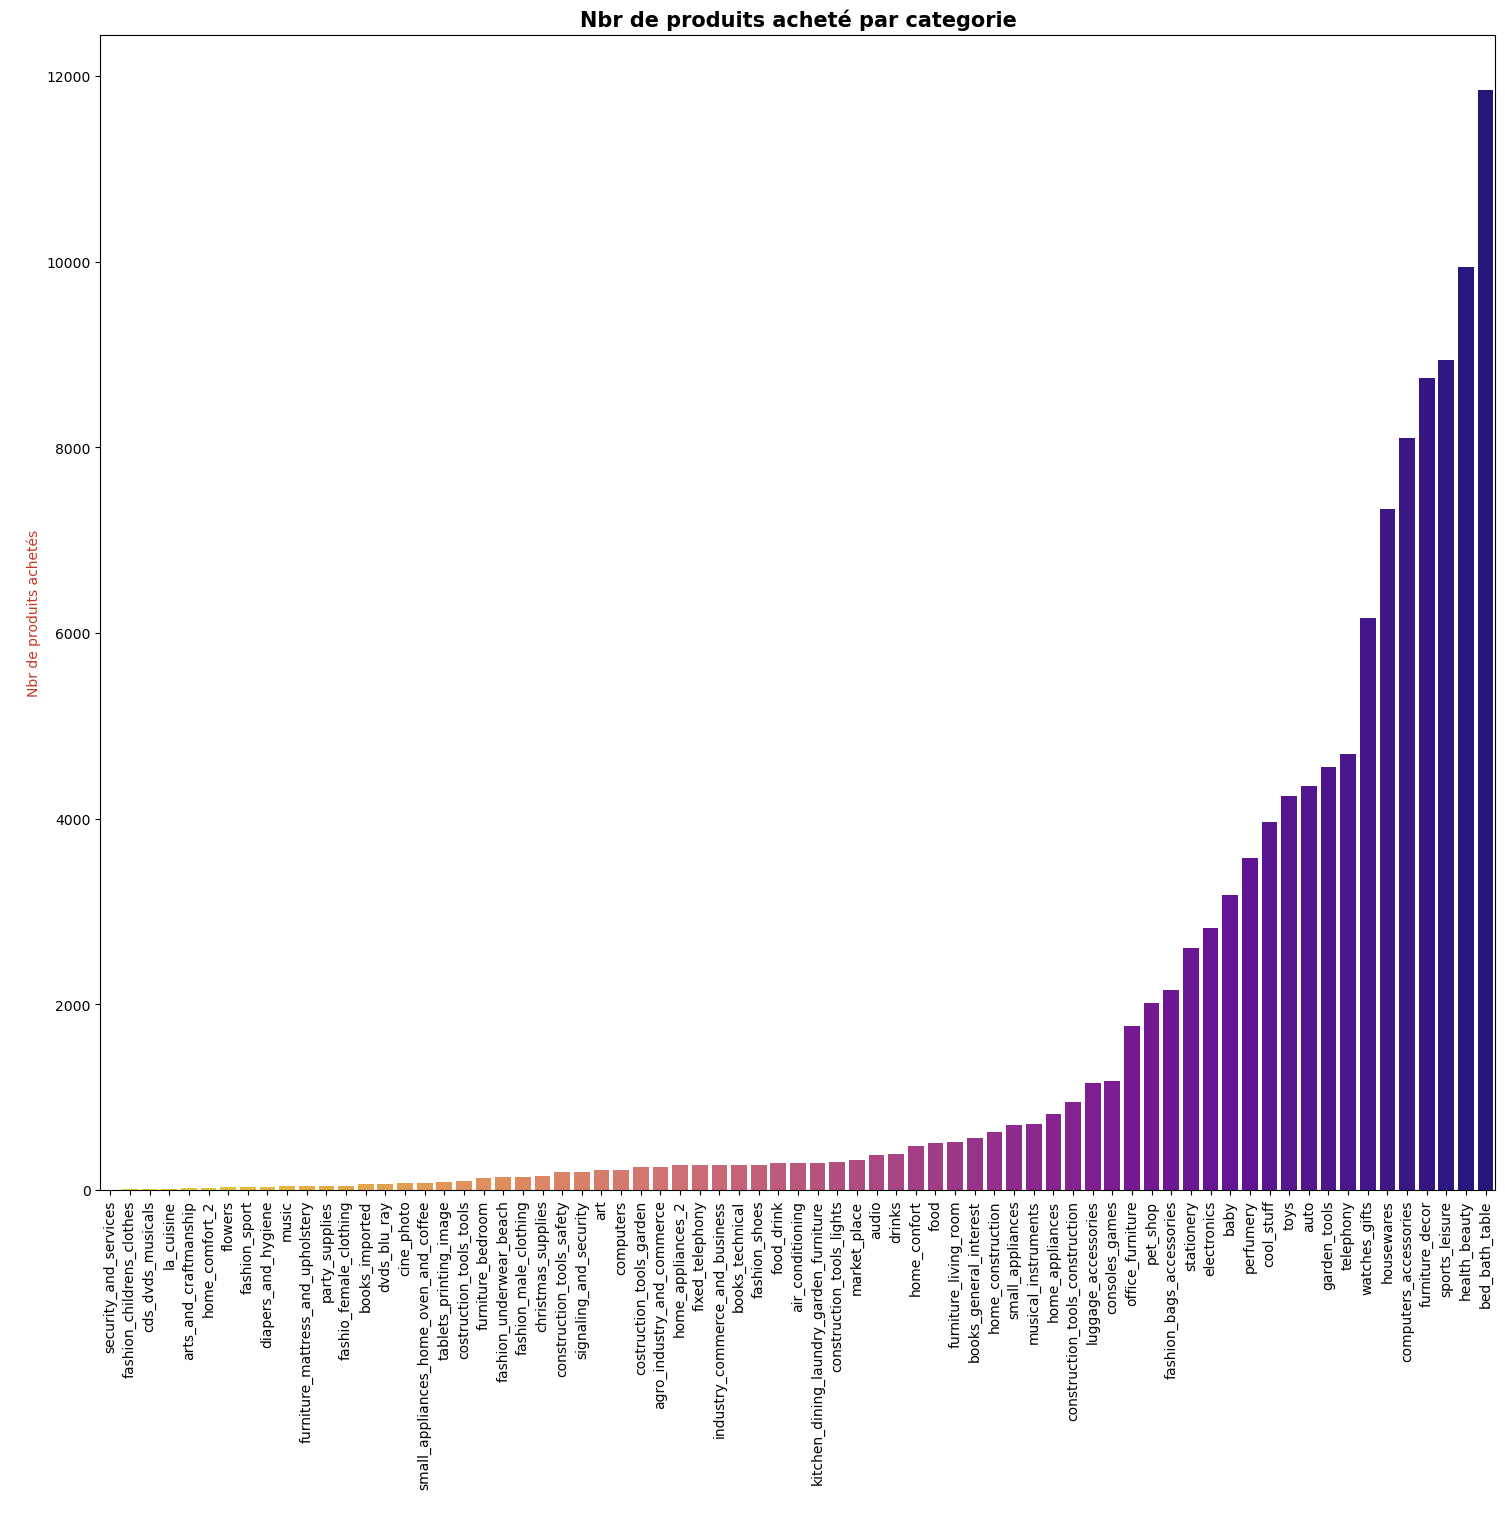

In [170]:
plt.figure(figsize=(18,15))
sns.barplot(x=Nbr_Prod.index, y=Nbr_Prod.values, palette="plasma_r")
#sns.barplot(x=Nbr_Prod.index, y=Nbr_Prod.values, palette="RdBu")
#sns.barplot(x=Nbr_Prod.index, y=Nbr_Prod.values, palette="spring_r")
plt.xlabel(" \n", fontsize=10, color='#c0392b')
plt.ylabel('\nNbr de produits achetés', fontsize=10, color='#c0392b')
plt.title("Nbr de produits acheté par categorie", fontsize=15, weight ='bold')
plt.xticks(rotation= 90)
#plt.tight_layout()
plt.show()

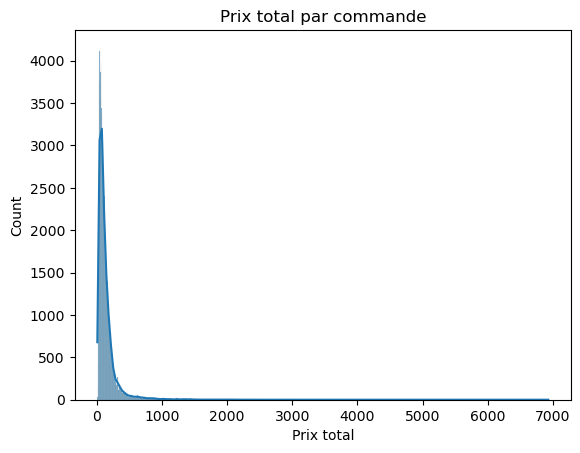

In [112]:
# Total price of an order 
df_m['total_order_price'] = df_m['price'] + df_m['freight_value']

sns.histplot(df_m['total_order_price'], kde=True)
plt.xlabel('Prix total')
plt.ylabel('Count')
plt.title('Prix total par commande')
plt.show()

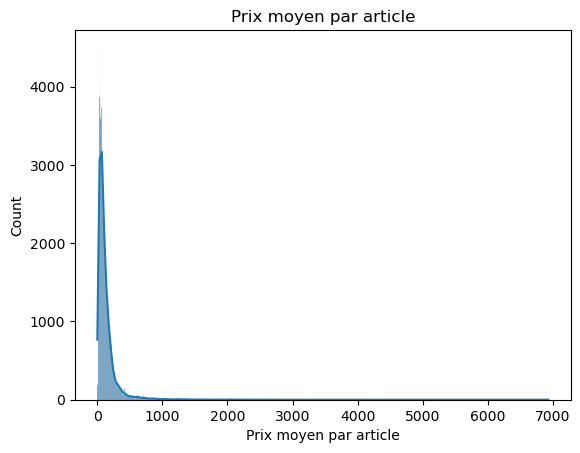

In [113]:
df_m['average_price_per_item'] = df_m['total_order_price'] / df_m['order_item_id']

# Graph
sns.histplot(df_m['average_price_per_item'], kde=True)
plt.xlabel('Prix moyen par article')
plt.ylabel('Count')
plt.title('Prix moyen par article')
plt.show()

In [114]:
# Note moyenne par client, création et ajout de la fonctionnalité au df
average_review_score = df_m.groupby('customer_id')['review_score'].mean().reset_index()
average_review_score.rename(columns={'review_score': 'average_review_score'}, inplace=True)
df_f = pd.merge(df_m, average_review_score, on='customer_id', how='left')

### graphique des notes des clients

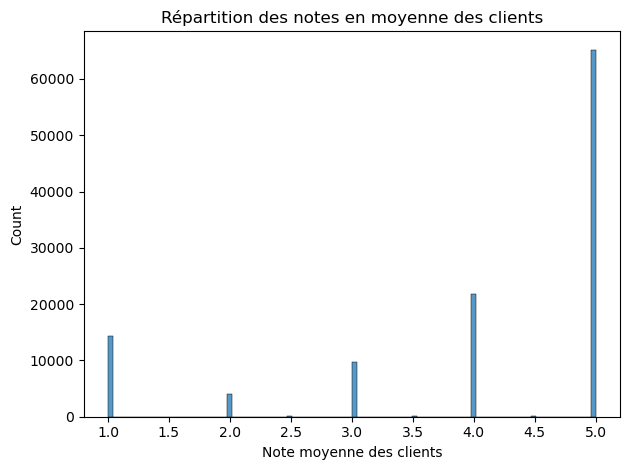

In [171]:
sns.histplot(df_f['average_review_score'])
plt.xlabel('Note moyenne des clients')
plt.ylabel('Count')
plt.title('Répartition des notes en moyenne des clients')
plt.tight_layout()
plt.show()

## <a name="C3"> Les features RFM</a>
<a href="#C5">Haut</a>



In [175]:
df_m.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,total_order_price,average_price_per_item
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,146.87,146.870
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.89,137.890
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.89,68.945
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,140.61,140.610
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture,137.58,137.580


In [176]:
df_m.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'total_order_price',
       'average_price_per_item'],
      dtype='object')

### Calcul de la récence 

In [177]:
df_m['order_purchase_timestamp'] = pd.to_datetime(df_m['order_purchase_timestamp'])

In [178]:
df_recency = df_m.groupby(by='customer_unique_id', 
                        as_index=False)['order_purchase_timestamp'].max()
df_recency.columns = ['CustomerID', 'DateDernierAchat']
recent_date = df_recency['DateDernierAchat'].max()
df_recency['Recency'] = df_recency['DateDernierAchat'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,DateDernierAchat,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292


### Calcul de la fréquence
Nous calculons ici la fréquence des transactions fréquentes du client lors de la commande/achat d'un produit de l'entreprise

In [179]:
frequency_df = df_m.drop_duplicates().groupby(
    by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


### Calcul de la valeur monétaire
Ici, nous calculons la valeur monétaire des dépenses des clients pour l'achat des produits.


In [181]:
monetary_df = df_m.groupby('customer_unique_id').agg({'price': sum, 'freight_value': sum}).reset_index()
monetary_df['Monetary'] = monetary_df['price'] + monetary_df['freight_value']
monetary_df = monetary_df[['customer_unique_id', 'Monetary']]
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


### Fusionner les trois colonnes dans un seul dataframe

In [182]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(columns='DateDernierAchat')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [183]:
rfm_df.to_csv('rfm_df0.csv',  index=False)
df_m.to_csv('df_m0.csv', index=False)

### Répartition des fonctionnalités RFM

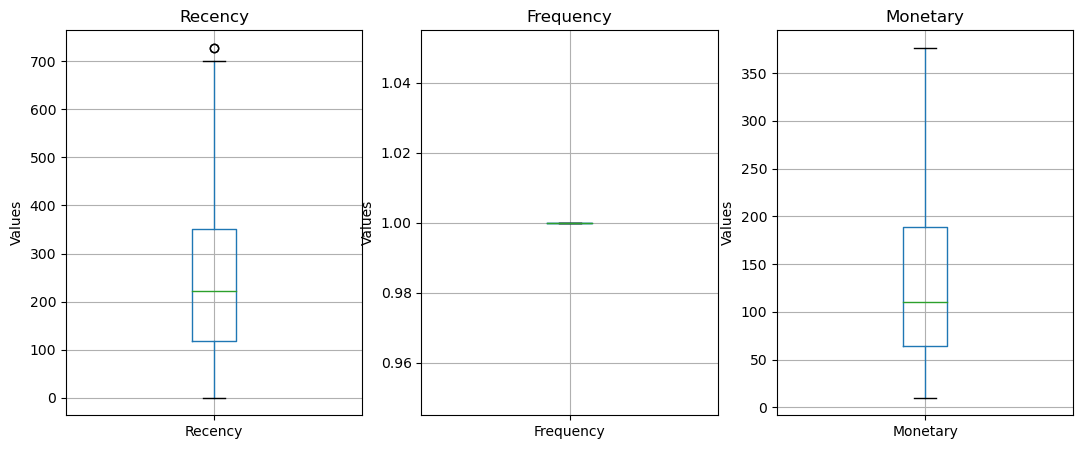

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (13, 5))

# First chart
rfm_df.boxplot(column = ['Recency'], ax = ax1)
ax1.set_title('Recency')

# Second chart
rfm_df.boxplot(column=['Frequency'], ax = ax2, showfliers = False)
ax2.set_title('Frequency')

# Third chart
rfm_df.boxplot(column = ['Monetary'], ax = ax3, showfliers = False)
ax3.set_title('Monetary')

# Adding details
for ax in [ax1, ax2, ax3]:
    ax.set_ylabel('Values')

plt.show()

### Classement des clients en fonction de leur récence, de leur fréquence et de leur score monétaire
Ici, nous normalisons le classement des clients au sein de l'entreprise pour analyser le classement

In [193]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,75.947043,42.495396,42.495396,2.38,Client ordinaire
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,74.906313,42.495396,42.495396,2.37,Client ordinaire
2,0000f46a3911fa3c0805444483337064,541,1,86.22,3.559574,42.495396,42.495396,1.83,Client ordinaire
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,28.685918,42.495396,42.495396,2.02,Client ordinaire
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,33.710758,42.495396,42.495396,2.06,Client ordinaire


In [194]:
rfm_df.shape

(93396, 9)

In [196]:
rfm_df.to_csv('rfm_df1.csv', index=False)

### Calcul du score RFM

Le score RFM est calculé en fonction de la récence, de la fréquence et de la valeur monétaire normalisant les classements. Sur la base de ce score, nous divisons nos clients. Ici, nous les évaluons sur une échelle de 5. La formule utilisée pour calculer le score rfm est : 0,15*Score de récence + 0,28*Score de fréquence + 0,57 *Score monétaire


In [197]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2.38
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.37
2,0000f46a3911fa3c0805444483337064,1.83
3,0000f6ccb0745a6a4b88665a16c9f078,2.02
4,0004aac84e0df4da2b147fca70cf8255,2.06
5,0004bd2a26a76fe21f786e4fbd80607f,2.31
6,00050ab1314c0e55a6ca13cf7181fecf,2.34


### Calcul du score RFM

Notation du client sur la base du score RFM

score rfm >4,5 : Meilleur client

4,5 > score rfm > 4 : Exellent client

4>score rfm >3 : Client moyen

3>score rfm>1,6 : Client ordinaire

score rfm<1,6 : Client occasionel

In [198]:
rfm_df["Segment_Client"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Exellent client", 
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "Bon client",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             " Client moyen",
                             np.where(rfm_df['RFM_Score'] > 1.6, 
                            'Client ordinaire', 'Client occasionel'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Segment_Client']].head(20)

,CustomerID,RFM_Score,Segment_Client
0,0000366f3b9a7992bf8c76cfdf3221e2,2.38,Client ordinaire
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.37,Client ordinaire
2,0000f46a3911fa3c0805444483337064,1.83,Client ordinaire
3,0000f6ccb0745a6a4b88665a16c9f078,2.02,Client ordinaire
4,0004aac84e0df4da2b147fca70cf8255,2.06,Client ordinaire
5,0004bd2a26a76fe21f786e4fbd80607f,2.31,Client ordinaire
6,00050ab1314c0e55a6ca13cf7181fecf,2.34,Client ordinaire
7,00053a61a98854899e70ed204dd4bafe,4.28,Bon client
8,0005e1862207bf6ccc02e4228effd9a0,1.83,Client ordinaire
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.27,Client ordinaire


### Vue de la segmentation des clients

Ici, nous utiliserons un diagramme circulaire pour afficher tous les segments.

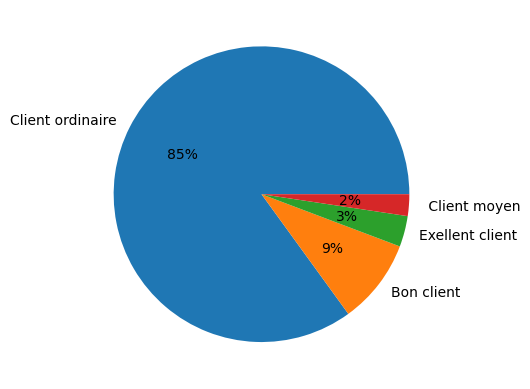

In [199]:
plt.pie(rfm_df.Segment_Client.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Je vais maintenant passer à la modelisation avec Kmean.